In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
processes = pd.read_csv("process_memory.csv", index_col = False)
processes

,Process,Initial Memory (kB),Final Memory (kB)
0,hostapd,2704,2728
1,sdcsupp,4964,4960
2,sdcsupp,4716,4700
3,hostapd,3360,3372
4,ieee1905_transport,5516,5356
5,beerocks_controller,10408,10716
6,beerocks_agent,11616,11404
7,beerocks_fronthaul,8384,8544
8,beerocks_fronthaul,8672,8868


In [3]:
aggregation_functions = {"Initial Memory (kB)": "sum", "Final Memory (kB)": "sum", "Process": "max"}
single_processes = processes.groupby(processes['Process']).aggregate(aggregation_functions)
# single_processes.drop(columns=single_processes.columns[0], axis = 1, inplace = True)
single_processes

,Initial Memory (kB),Final Memory (kB),Process
Process,,,
beerocks_agent,11616,11404,beerocks_agent
beerocks_controller,10408,10716,beerocks_controller
beerocks_fronthaul,17056,17412,beerocks_fronthaul
hostapd,6064,6100,hostapd
ieee1905_transport,5516,5356,ieee1905_transport
sdcsupp,9680,9660,sdcsupp


<BarContainer object of 9 artists>

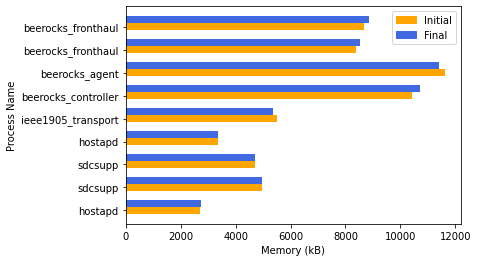

In [4]:
# Plot Memory of each Individual Process
# Plot total memory of each process
height = 0.3
initial_memory = processes["Initial Memory (kB)"]
final_memory = processes["Final Memory (kB)"]

labels = processes["Process"]

colors = {"Initial": 'orange', "Final": 'royalblue'}
legend_labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colors[label]) for label in legend_labels ]
plt.legend(handles, legend_labels)

plt.ylabel("Process Name")
plt.xlabel("Memory (kB)")
plt.yticks(range(len(initial_memory)), labels=labels)
# plt.legend()
plt.barh(np.arange(len(initial_memory)),initial_memory , height = height, color = "orange")
plt.barh(np.arange(len(final_memory)) + height, final_memory , height = height, color = 'royalblue')

<BarContainer object of 6 artists>

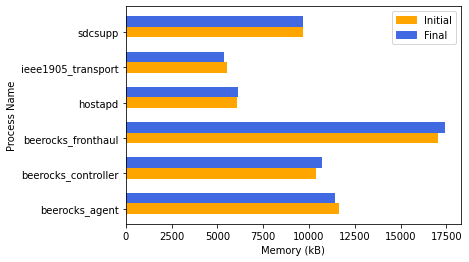

In [5]:
# Plot Memory of each Individual Process
# Plot total memory of each process
height = 0.3
initial_memory = single_processes["Initial Memory (kB)"]
final_memory = single_processes["Final Memory (kB)"]

labels = single_processes["Process"]

colors = {"Initial": 'orange', "Final": 'royalblue'}
legend_labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colors[label]) for label in legend_labels ]
plt.legend(handles, legend_labels)
plt.ylabel("Process Name")
plt.xlabel("Memory (kB)")
plt.yticks(range(len(initial_memory)), labels=labels)
# plt.legend()
plt.barh(np.arange(len(initial_memory)),initial_memory , height = height, color = "orange")
plt.barh(np.arange(len(final_memory)) + height, final_memory , height = height, color = 'royalblue')